# Model Building and Evaluation, Regression and Classification
# By Vivian Zeng 08/26/2020

# Part One: Regression with the Ames Housing Data Set

### 1. Load the Ames housing data. We will use the variables Sale_Price, Lot_Area, Year_Built, Gr_Liv_Area, Total_Bsmt_SF, Full_Bath to predict Sale_Price. Print the first few rows. (5 pts)

In [760]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, GridSearchCV, cross_validate, train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, recall_score, precision_score, confusion_matrix, \
roc_auc_score, roc_curve, precision_recall_curve
from math import sqrt

ames = pd.read_csv('ames.csv')
cols = ['Sale_Price', 'Lot_Area', 'Year_Built', 'Gr_Liv_Area', 'Total_Bsmt_SF', 'Full_Bath']
df = ames[cols].copy()
df = df.dropna()
df.head()

,Sale_Price,Lot_Area,Year_Built,Gr_Liv_Area,Total_Bsmt_SF,Full_Bath
0,215000,31770,1960,1656,1080,1
1,105000,11622,1961,896,882,1
2,172000,14267,1958,1329,1329,1
3,244000,11160,1968,2110,2110,2
4,189900,13830,1997,1629,928,2


### 2. Create a vector "y" of the response variable and a matrix "X" of predictors. Standardize both so that each column has mean 0 and variance 1. Print the first few rows of X. (5 pts)

Create a vector "y" of the response variable.

In [761]:
y=df.Sale_Price.values.reshape(-1, 1) #(build up np array, and a column vector for regression)
y

array([[215000],
       [105000],
       [172000],
       ...,
       [132000],
       [170000],
       [188000]])

Creat a matrix "X" of predictors

In [762]:
X = df. drop('Sale_Price', axis=1).values
X

array([[31770,  1960,  1656,  1080,     1],
       [11622,  1961,   896,   882,     1],
       [14267,  1958,  1329,  1329,     1],
       ...,
       [10441,  1992,   970,   912,     1],
       [10010,  1974,  1389,  1389,     1],
       [ 9627,  1993,  2000,   996,     2]])

Standardize both X and y so that each column has mean 0 and variance 1. 

In [763]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [764]:
scaler=StandardScaler()
y=scaler.fit_transform(y)

In [765]:
print(X[:5, ])

[[ 2.74438073 -0.37553701  0.30926506  0.06519583 -1.02479289]
 [ 0.18709726 -0.34246845 -1.19442705 -0.38389297 -1.02479289]
 [ 0.5228137  -0.44167415 -0.33771825  0.62995901 -1.02479289]
 [ 0.12845795 -0.11098849  1.20752324  2.40136483  0.7840283 ]
 [ 0.46734751  0.84799991  0.25584442 -0.27955921  0.7840283 ]]


### 3. Fit 3 linear regression models to predict y from X. For each model, print the RMSE using the entire dataset (i.e. you don't need to split into training and testing). (10 pts)

### 3.1 Model 1: Use all of the variables as predictors

In [766]:
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [767]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [768]:
preds=lm.predict(X)
RMSE=sqrt(mean_squared_error(y, preds))
print(RMSE)

0.533662808021502


### 3.2 Model 2: Use all of the variables, but also add interactions and quadratic terms.

In [769]:
poly=PolynomialFeatures(degree=2)
Z=poly.fit_transform(X)

In [770]:
lm=LinearRegression()
lm.fit(Z,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [771]:
preds=lm.predict(Z)
RMSE=sqrt(mean_squared_error(y, preds))
print(RMSE)

0.4483468819753568


### 3.3 Model 3: Use all of the variables, but also add interactions, quadratic and cubic terms.

In [772]:
poly=PolynomialFeatures(degree=3)
V=poly.fit_transform(X)

In [773]:
lm=LinearRegression()
lm.fit(V,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [774]:
preds=lm.predict(V)
RMSE=sqrt(mean_squared_error(y, preds))
print(RMSE)

0.37941846256262046


### 4. Fit each model again, but this time use 10-fold cross validation. For each model fit, calculate the error (RMSE) from the training set and test set. Create a chart that summarizes the training and test error distributions for each model. (20 pts)

Hint: For each of the 3 models you should have 10 values of RMSE for the training sets and 10 values of RMSE for the test sets (folds). 

In [775]:
y=df.Sale_Price.values.reshape(-1, 1)
X = df. drop('Sale_Price', axis=1).values

In [776]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

In [777]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
y_train=scaler.fit_transform(y_train)
y_test=scaler.fit_transform(y_test)

In [778]:
np.var(y_test)

1.0

### Model 1: Use all of the variables as predictors

Build up model

In [779]:
lm=LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [780]:
lm.score(X_test,y_test)

0.683600175864542

Create splits of the data for 10-fold cross validation

In [781]:
cv=KFold(10, shuffle=True)
cv.split(X_train)

<generator object _BaseKFold.split at 0x1a25552a50>

Iterate over the 10 folds of the training data, at each stage using 9 folds for training and 1 for validation.
Try values of .01, .1, 1.0 and 10.0,100 for values of the regularization parameter C. Save the accuracy from each fit of the model.

In [782]:
for train_index, test_index in cv.split(X_train):
    print(train_index)

[   0    1    2 ... 2341 2342 2343]
[   0    1    2 ... 2341 2342 2343]
[   0    2    4 ... 2341 2342 2343]
[   1    2    3 ... 2340 2342 2343]
[   0    1    2 ... 2339 2341 2342]
[   0    1    2 ... 2341 2342 2343]
[   0    1    2 ... 2340 2341 2343]
[   0    1    2 ... 2341 2342 2343]
[   0    1    3 ... 2341 2342 2343]
[   0    1    2 ... 2341 2342 2343]


In [783]:
lm=LinearRegression()
RMSE_train_1=np.empty((10,9))
RMSE_test_1=np.empty((10,9))

for k, (train_index,test_index) in enumerate(cv.split(X_train)):
    lm.fit(X_train[train_index], y_train[train_index])
    RMSE_train_1[k]=sqrt(mean_squared_error(y_train[train_index], lm.predict(X_train[train_index])))
    RMSE_test_1[k]=sqrt(mean_squared_error(y_train[test_index], lm.predict(X_train[test_index])))

In [784]:
print('RMSE for the training sets: \n', RMSE_train_1.mean(axis=1))
print('RMSE for the test sets:: \n', RMSE_test_1.mean(axis=1))

RMSE for the training sets: 
 [0.53045027 0.53043131 0.53062898 0.52902077 0.52636184 0.53640955
 0.52776571 0.4980635  0.5299909  0.52445199]
RMSE for the test sets:: 
 [0.49575569 0.49562424 0.49383995 0.51331815 0.53502171 0.43378078
 0.52396032 0.75962782 0.50022738 0.55281333]


### Model 2:  Use all of the variables, but also add interactions and quadratic terms.

In [785]:
poly=PolynomialFeatures(degree=2)
Z=poly.fit_transform(X)

In [786]:
Z_train, Z_test, y_train, y_test = train_test_split(Z,y, test_size=.2)
scaler=StandardScaler()
Z_train=scaler.fit_transform(Z_train)
Z_test=scaler.fit_transform(Z_test)
y_train=scaler.fit_transform(y_train)
y_test=scaler.fit_transform(y_test)

In [787]:
lm=LinearRegression()
lm.fit(Z_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [788]:
cv=KFold(10, shuffle=True)
cv.split(Z_train)

<generator object _BaseKFold.split at 0x1a255520d0>

In [789]:
for train_index, test_index in cv.split(Z_train):
    print(train_index)

[   0    1    2 ... 2341 2342 2343]
[   0    1    2 ... 2340 2342 2343]
[   0    1    2 ... 2340 2341 2342]
[   0    1    2 ... 2341 2342 2343]
[   0    1    2 ... 2341 2342 2343]
[   0    1    2 ... 2341 2342 2343]
[   0    1    2 ... 2340 2341 2343]
[   3    4    5 ... 2341 2342 2343]
[   0    1    2 ... 2341 2342 2343]
[   0    1    2 ... 2341 2342 2343]


In [790]:
lm=LinearRegression()
RMSE_train_2=np.empty((10,9))
RMSE_test_2=np.empty((10,9))

for k, (train_index,test_index) in enumerate(cv.split(Z_train)):
    lm.fit(Z_train[train_index], y_train[train_index])
    RMSE_train_2[k]=sqrt(mean_squared_error(y_train[train_index], lm.predict(Z_train[train_index])))
    RMSE_test_2[k]=sqrt(mean_squared_error(y_train[test_index], lm.predict(Z_train[test_index])))

In [791]:
print('RMSE for the training sets: \n', RMSE_train_2.mean(axis=1))
print('RMSE for the test sets:: \n', RMSE_test_2.mean(axis=1))

RMSE for the training sets: 
 [0.3947764  0.45306612 0.4480648  0.44921509 0.45487973 0.45218289
 0.44865588 0.45493298 0.45416665 0.44629826]
RMSE for the test sets:: 
 [1.39458609 0.42595827 0.47204976 0.46249904 0.41063091 0.43412531
 0.46758779 0.4210248  0.4113387  0.4929958 ]


### Model 3: Use all of the variables, but also add interactions, quadratic and cubic terms.

In [792]:
poly=PolynomialFeatures(degree=3)
V=poly.fit_transform(X)

In [793]:
V_train, V_test, y_train, y_test = train_test_split(V,y, test_size=.2)
scaler=StandardScaler()
V_train=scaler.fit_transform(V_train)
V_test=scaler.fit_transform(V_test)
y_train=scaler.fit_transform(y_train)
y_test=scaler.fit_transform(y_test)

In [794]:
lm=LinearRegression()
lm.fit(V_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [795]:
cv=KFold(10, shuffle=True)
cv.split(V_train)

<generator object _BaseKFold.split at 0x1a25552650>

In [796]:
for train_index, test_index in cv.split(V_train):
    print(train_index)

[   0    1    3 ... 2341 2342 2343]
[   1    2    3 ... 2341 2342 2343]
[   0    1    2 ... 2341 2342 2343]
[   0    1    2 ... 2340 2341 2343]
[   0    1    2 ... 2341 2342 2343]
[   0    1    2 ... 2341 2342 2343]
[   0    1    2 ... 2340 2341 2342]
[   0    1    2 ... 2341 2342 2343]
[   0    1    2 ... 2340 2342 2343]
[   0    2    3 ... 2341 2342 2343]


In [797]:
lm=LinearRegression()
RMSE_train_3=np.empty((10,9))
RMSE_test_3=np.empty((10,9))

for k, (train_index,test_index) in enumerate(cv.split(V_train)):
    lm.fit(V_train[train_index], y_train[train_index])
    RMSE_train_3[k]=sqrt(mean_squared_error(y_train[train_index], lm.predict(V_train[train_index])))
    RMSE_test_3[k]=sqrt(mean_squared_error(y_train[test_index], lm.predict(V_train[test_index])))

In [798]:
print('RMSE for the training sets: \n', RMSE_train_3.mean(axis=1))
print('RMSE for the test sets:: \n', RMSE_test_3.mean(axis=1))

RMSE for the training sets: 
 [0.37894283 0.37734878 0.37175351 0.36956985 0.37192529 0.37418666
 0.38113593 0.37500845 0.37477503 0.35368207]
RMSE for the test sets:: 
 [0.58688979 0.37796636 0.43806426 1.68453666 0.45426082 0.41084452
 0.37073611 0.41099339 0.42330148 0.97755318]


### Create a chart that summarizes the training and test error distributions for each model.

In [799]:
name = np.array(['train', 'train', 'train', 'train', 'train','train', 'train', 'train', 'train', 'train', 'test', 'test','test','test','test', 'test', 'test','test','test','test'])
name

array(['train', 'train', 'train', 'train', 'train', 'train', 'train',
       'train', 'train', 'train', 'test', 'test', 'test', 'test', 'test',
       'test', 'test', 'test', 'test', 'test'], dtype='<U5')

In [800]:
df1=pd.DataFrame()

df1['Value']=np.concatenate((RMSE_train_1.mean(axis=1),RMSE_test_1.mean(axis=1)), axis=0)
df1['Model']='Linear'
df1['RMSE']=np.array(name)
df1

df2=pd.DataFrame()

df2['Value']=np.concatenate((RMSE_train_2.mean(axis=1),RMSE_test_2.mean(axis=1)), axis=0)
df2['Model']='quadratic'
df2['RMSE']=np.array(name)
df2

df3=pd.DataFrame()

df3['Value']=np.concatenate((RMSE_train_3.mean(axis=1),RMSE_test_3.mean(axis=1)), axis=0)
df3['Model']='cubic'
df3['RMSE']=np.array(name)
df3

rmse=df1.append(df2).append(df3)
rmse.head()

,Value,Model,RMSE
0,0.530450,Linear,train
1,0.530431,Linear,train
2,0.530629,Linear,train
3,0.529021,Linear,train
4,0.526362,Linear,train


(0.3, 0.85)

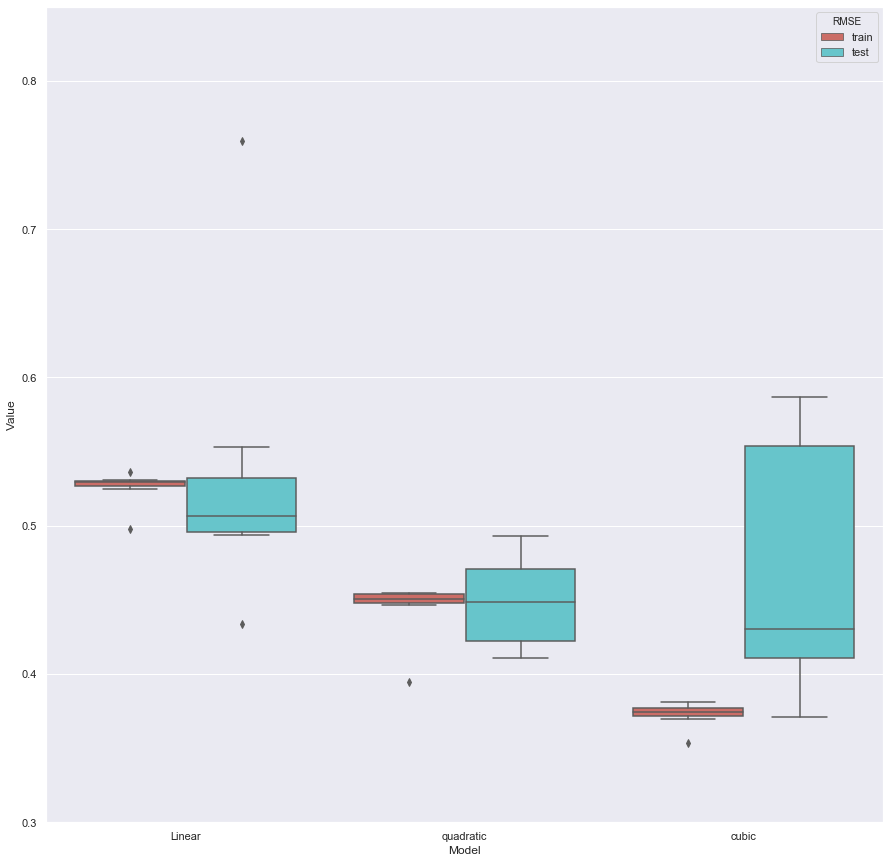

In [801]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.boxplot(x="Model", y="Value", hue="RMSE", data=rmse, palette="hls")
ax.set_ylim(0.3, 0.85)

### 5. We want to predict the sale price of a home not included in this dataset. Write a short paragraph explaining which model you would recommend for this problem and why. (10 pts)

Answer: The quadratic regression model could be recommended to predict a new sale price of a home. Compare to simple linear and cubic regression models, the quadratic regression model provide relatively low bias, low variance and importantly, low RMSE. The variance of the simple linear model is low, however it trends to over estimate some area leading to higher RMSE and bias. On the other hand, the median RMSE of cubic model is lower than the simple linear model and close to the quadratic one, but the high variance due to the over fitting. The quadratic regression model could be able to predict responses very close to the true responses, and fit the data better.

# Part Two: Classification with the Heart Disease Data Set

### 1. Load the heart disease data. The response variable, "hd", has been encoded as a binary variable (1 for heart disease, 0 without heart disease). Extract this as a vector and call this "y". Print the proportion of individuals in this data that have heart disease. (2 pts)

In [918]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63,male,typical_angina,145,233,higher_than_120,left_vent_hypertrophy,150,no,2.3,downsloping,0.0,fixed_defect,0
1,67,male,asymptomatic,160,286,lower_than_120,left_vent_hypertrophy,108,yes,1.5,flat,3.0,normal,1
2,67,male,asymptomatic,120,229,lower_than_120,left_vent_hypertrophy,129,yes,2.6,flat,2.0,reversable_defect,1
3,37,male,non_anginal_pain,130,250,lower_than_120,normal,187,no,3.5,downsloping,0.0,normal,0
4,41,female,atypical_angina,130,204,lower_than_120,left_vent_hypertrophy,172,no,1.4,upsloping,0.0,normal,0


In [919]:
y = heart.hd.values.reshape(-1, 1)

In [920]:
print('proportion of individuals with heart disease:', np.mean(y).round(3))

proportion of individuals with heart disease: 0.459


### 2. We are going to fit a logistic regression model using the variables, age, trestbps, chol, thalach, sex, restecg, slope, and cp as predictors. Create a data matrix, X, of these predictors, and convert the categorical predictors to dummy variables (dropping the redundant column). Print the first few rows of X. (3 pts)

In [921]:
cols = ['age', 'trestbps', 'chol', 'thalach', 'sex', 'restecg', 'slope', 'cp']
X = heart[cols].copy()
X.head()

,age,trestbps,chol,thalach,sex,restecg,slope,cp
0,63,145,233,150,male,left_vent_hypertrophy,downsloping,typical_angina
1,67,160,286,108,male,left_vent_hypertrophy,flat,asymptomatic
2,67,120,229,129,male,left_vent_hypertrophy,flat,asymptomatic
3,37,130,250,187,male,normal,downsloping,non_anginal_pain
4,41,130,204,172,female,left_vent_hypertrophy,upsloping,atypical_angina


In [922]:
X=pd.get_dummies(X, drop_first=True)

In [923]:
X.head()

,age,trestbps,chol,thalach,sex_male,restecg_normal,restecg_stt_wave_abnormality,slope_flat,slope_upsloping,cp_atypical_angina,cp_non_anginal_pain,cp_typical_angina
0,63,145,233,150,1,0,0,0,0,0,0,1
1,67,160,286,108,1,0,0,1,0,0,0,0
2,67,120,229,129,1,0,0,1,0,0,0,0
3,37,130,250,187,1,1,0,0,0,0,1,0
4,41,130,204,172,0,0,0,0,1,1,0,0


### 3. Split the data (X and y) into training and testing datasets using a 60%/40% split, stratifying on the response variable. Standardize the training data (features) so that each column has mean 0 and variance 1. Apply this transformation to the test data set. Print the first few rows of each matrix. (10 pts)
Note: For this question, it is optional to standardize (or not standardize) the dummy variables. 

In [924]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.4,stratify=y)

In [925]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
print('X training dataset top 5 rows:\n', X_train[5,:])
print('X test dataset top 5 rows:\n',X_test[5,:])

X training dataset top 5 rows:
 [ 1.12710048  0.79045692 -0.67253634 -0.74519606  0.63490218 -0.96204569
 -0.1298227   1.08661074 -0.96204569 -0.49827288 -0.67799515 -0.24182542]
X test dataset top 5 rows:
 [-0.83481981 -0.17692173 -0.01796066  1.35212374  0.76447079 -1.05045146
 -0.09090909  1.06787213 -0.90603285  2.7774603  -0.55841558 -0.34534918]


### 4. Fit two models to the training data. Print the fitted coefficients from each model. (10 pts)
### Model 1: a logistic regression model (with no regularization)

In [927]:
lr1 = LogisticRegression(C=1000)
lr1.fit(X_train, y_train)
print('Coefficients of model with no regularization: \n', lr1.coef_)

Coefficients of model with no regularization: 
 [[ 0.29797482  0.36352051  0.44703834 -0.40293578  1.33466814 -0.11876284
   0.00986561  0.2283318  -0.53746701 -0.78128333 -1.25860792 -0.53447136]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Model 2: an L1 regularized logistic regression model (choose the tuning parameter by using 10-fold cross validation on the training dataset).  (Hint: You might find the LogisticRegressionCV function useful for this part.)

Use LogisticRegressionCV function to determine C value

In [928]:
lr=LogisticRegressionCV(Cs=Cs, cv=10, penalty='l1', solver='liblinear')

In [929]:
lr.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10, 100, 1000], class_weight=None,
                     cv=10, dual=False, fit_intercept=True,
                     intercept_scaling=1.0, l1_ratios=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l1',
                     random_state=None, refit=True, scoring=None,
                     solver='liblinear', tol=0.0001, verbose=0)

In [930]:
lr.C_

array([1.])

Build up the model

In [931]:
lr2 = LogisticRegression(C=1)
lr2.fit(X_train, y_train)
print('Coefficients of an L1 regularized model: \n', lr2.coef_)

Coefficients of an L1 regularized model: 
 [[ 0.27180861  0.33548259  0.39505964 -0.4223912   1.18007687 -0.10527962
   0.00141235  0.24168152 -0.46575134 -0.69733527 -1.12474623 -0.46284358]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 5. For both models, make predictions on the test set, and compute the following metrics: (10 pts)
Accuracy,
FPR,
Recall,
Precision,
False-discovery rate

Predictions of unregularized model

In [932]:
preds1 = lr1.predict(X_test)

In [933]:
conf_mat = confusion_matrix(y_test, preds1)
tn1, fp1, fn1, tp1 = conf_mat.ravel()

In [934]:
print('For Unregulzrized model:\n')
print('Accuracy:', accuracy_score(y_test, preds1))
print('Recall:', recall_score(y_test, preds1))
print('Precision:', precision_score(y_test, preds1))
print('False-discovery rate:', fp1 / (fp1 + tp1))

For Unregulzrized model:

Accuracy: 0.7540983606557377
Recall: 0.7678571428571429
Precision: 0.7166666666666667
False-discovery rate: 0.2833333333333333


Predictions of regularized model

In [935]:
preds2 = lr2.predict(X_test)

In [936]:
conf_mat = confusion_matrix(y_test, preds2)
tn2, fp2, fn2, tp2 = conf_mat.ravel()

In [937]:
print('For Regulzrized model:\n')
print('Accuracy:', accuracy_score(y_test, preds2))
print('Recall:', recall_score(y_test, preds2))
print('Precision:', precision_score(y_test, preds2))
print('False-discovery rate:', fp2 / (fp2 + tp2))

For Regulzrized model:

Accuracy: 0.7377049180327869
Recall: 0.7321428571428571
Precision: 0.7068965517241379
False-discovery rate: 0.29310344827586204


### 6. Plot the ROC curves and compute the AUC for each model. (10 pts)

For unregularized model

Text(0, 0.5, 'TPR / Recall')

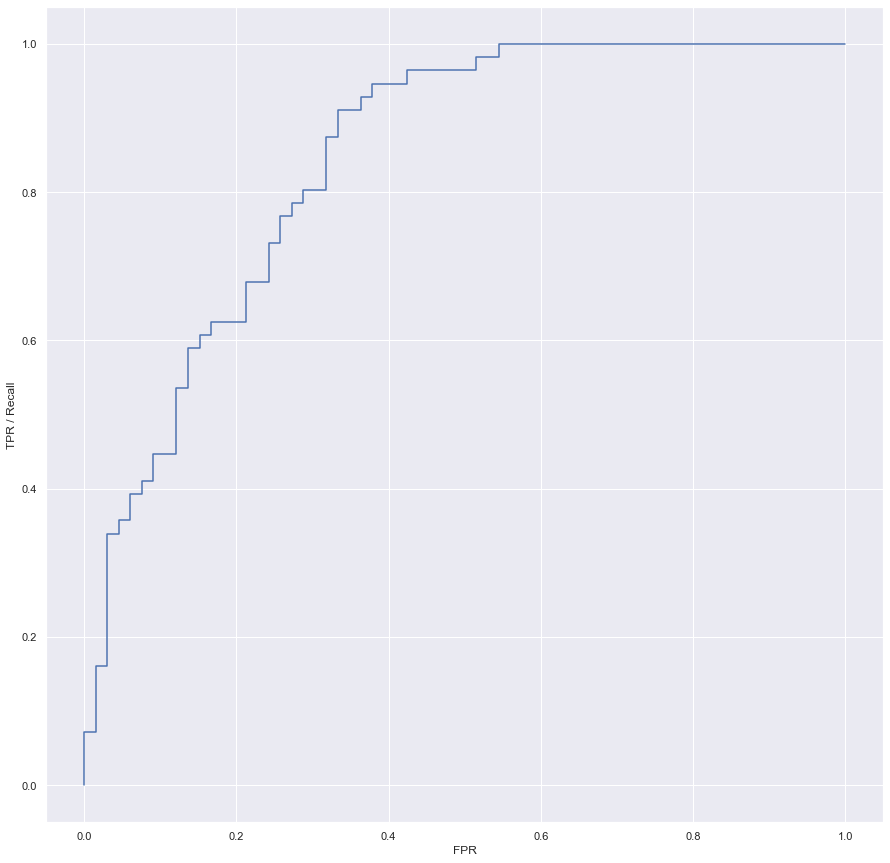

In [938]:
probs1 = lr1.predict_proba(X_test)[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probs1)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR / Recall')

In [939]:
print('AUC: ', roc_auc_score(y_test, probs1))

AUC:  0.8438852813852813


regularized model

Text(0, 0.5, 'TPR / Recall')

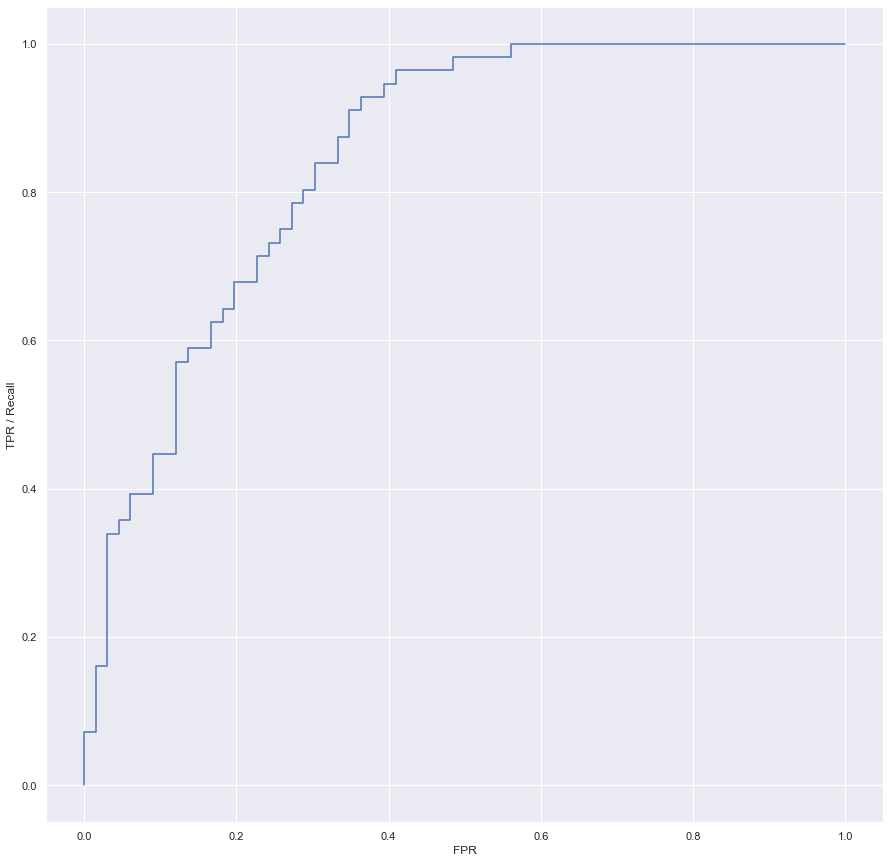

In [940]:
probs2 = lr2.predict_proba(X_test)[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probs2)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR / Recall')

In [941]:
print('AUC: ', roc_auc_score(y_test, probs2))

AUC:  0.8449675324675324


### 7. The default classification rule for logistic regression is to label heart disease if the predicted probability is greater than 0.5. Based on the metrics and curves you plotted for the best model, what are some reasons you might increase or lower this threshold? What are the tradeoffs between false-positives and false-negatives? (5 pts)

The default classification rule for logistic regression is to label heart disease if the predicted probability is greater than 0.5. The AUCs are 0.84 based on both regularized and regularized models. The recalls are around 0.73 and 0.76. Therefore, there is pretty much space allowing us to play with the thresholds that minimizes the miss-classification cost as needed. We could sacrifice some "recall" to enhance the false positive rate, let's say down the recall to around 0.6 to achieve the relatively lower FPR at around 0.15. As the recall/sensitivity goes lower, the false-positives goes lower, on the other hand, the false-negatives goes higher. This is the tradeoff between false-positives and false-negatives.